In [1]:
import warnings
warnings.filterwarnings("ignore")

# Imports

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Скачиваем данные

In [3]:
df = pd.read_csv('./german_credit_data_train.csv')
y = (df.Risk == 'good') * 1
df.drop('Risk', axis=1, inplace=True)

In [4]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [5]:
y

0      1
1      0
2      1
3      1
4      0
      ..
895    1
896    1
897    1
898    1
899    0
Name: Risk, Length: 900, dtype: int64

# Краткий анализ имеющихся данных

###### Баланс классов

In [6]:
y.value_counts(normalize=True)

1    0.702222
0    0.297778
Name: Risk, dtype: float64

###### Проверка пропусков

In [7]:
pd.isnull(df).sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     163
Checking account    356
Credit amount         0
Duration              0
Purpose               0
dtype: int64

###### Проверка типов данных

In [8]:
df.dtypes

Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

###### Проверка количества уникальных

In [9]:
df.nunique()

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       837
Duration             33
Purpose               8
dtype: int64

###### Просмотр некоторых фичей

In [12]:
df['Purpose'].value_counts(normalize=True)

car                    0.335556
radio/TV               0.274444
furniture/equipment    0.181111
business               0.098889
education              0.062222
repairs                0.022222
domestic appliances    0.013333
vacation/others        0.012222
Name: Purpose, dtype: float64

<AxesSubplot:>

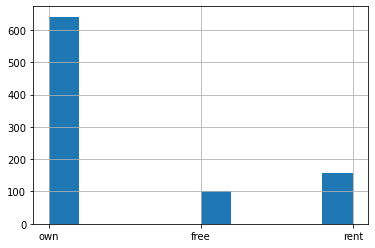

In [11]:
df['Housing'].hist()

# Предобработка данных

###### Map sex

In [13]:
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

###### Заполнение пропусков

In [14]:
df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
df['Checking account'] = df['Checking account'].fillna('Unknown')

###### Проверка заполнения пропусков

In [15]:
pd.isnull(df).sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
dtype: int64

### Кодирование Категориальных признаков

###### Выбор категориальных и количественных признаков

In [17]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,1,2,own,Unknown,little,1169,6,radio/TV
1,22,0,2,own,little,moderate,5951,48,radio/TV
2,49,1,1,own,little,Unknown,2096,12,education
3,45,1,2,free,little,little,7882,42,furniture/equipment
4,53,1,2,free,little,little,4870,24,car


In [18]:
num = ['Sex', 'Age', 'Credit amount', 'Duration']
cat = ['Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
target = 'Risk'

In [19]:
# pip install category_encoders

In [20]:
from category_encoders import OneHotEncoder
ohe = OneHotEncoder(cols=cat)

In [21]:
df = ohe.fit_transform(df)

In [22]:
df

,Age,Sex,Job_1,Job_2,Job_3,Job_4,Housing_1,Housing_2,Housing_3,Saving accounts_1,...,Credit amount,Duration,Purpose_1,Purpose_2,Purpose_3,Purpose_4,Purpose_5,Purpose_6,Purpose_7,Purpose_8
0,67,1,1,0,0,0,1,0,0,1,...,1169,6,1,0,0,0,0,0,0,0
1,22,0,1,0,0,0,1,0,0,0,...,5951,48,1,0,0,0,0,0,0,0
2,49,1,0,1,0,0,1,0,0,0,...,2096,12,0,1,0,0,0,0,0,0
3,45,1,1,0,0,0,0,1,0,0,...,7882,42,0,0,1,0,0,0,0,0
4,53,1,1,0,0,0,0,1,0,0,...,4870,24,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,31,1,0,0,1,0,1,0,0,1,...,8947,36,0,0,0,1,0,0,0,0
896,28,0,0,0,1,0,0,0,1,0,...,2606,21,1,0,0,0,0,0,0,0
897,35,0,1,0,0,0,1,0,0,0,...,1592,12,0,0,1,0,0,0,0,0
898,33,0,0,1,0,0,0,0,1,1,...,2186,15,0,0,1,0,0,0,0,0


# Генерация признаков

###### Полиномиальные признаки

In [23]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [24]:
df_p = pf.fit_transform(df)

In [25]:
df.shape

(900, 28)

In [26]:
df_p.shape

(900, 435)

###### Построение новых признаков

In [ ]:
df['feature_1'] = ... # Какая-то новая фича, которая повысит качество модели
df['feature_2'] = ... # Какая-то новая фича, которая повысит качество модели
...
df['feature_n'] = ... # Какая-то новая фича, которая повысит качество модели

In [27]:
from sklearn.model_selection import train_test_split

Xtr, Xval, ytr, yval = train_test_split(df, y, test_size=0.10, random_state=42)

# Выбор модели и оптимизация

###### Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV

In [29]:
dtc = DecisionTreeClassifier(min_samples_split=4)
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [30]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [31]:
GS_dtc.fit(X=Xtr, y=ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(min_samples_split=4),
             param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [32]:
GS_dtc.best_score_

0.6502409792126755

In [34]:
GS_dtc.best_params_

{'min_samples_split': 10}

###### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [37]:
GS_LR.fit(X=Xtr, y=ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 2.33572147e-07, 5.45559478e-07, 1.27427499e-06,
       2.97635144e-06, 6.95192796e-06, 1.62377674e-05, 3.79269019e-05,
       8.85866790e-05, 2.06913808e-04, 4.83293024e-04, 1.12883789e-03,
       2.63665090e-03, 6.15848211e-03, 1.43844989e-02, 3.35981829e-02,
       7.84759970e-02, 1.83298071e-01, 4.28133240e-01, 1.00000000e+00])},
             scoring='roc_auc')

In [38]:
# Лучшая модель при параметре "C"
GS_LR.best_params_

{'C': 1.0}

In [39]:
# Лучший показатель ROC_AUC
GS_LR.best_score_

0.7554004783872872

In [40]:
GS_LR.best_estimator_.coef_

array([[ 2.81191074e-02,  3.10953532e-01,  2.38647166e-01,
         2.70574853e-04, -8.48397160e-02, -1.44564922e-02,
         4.12737758e-01, -1.84006943e-01, -8.91092818e-02,
         2.49575845e-01, -3.84309757e-01,  1.52543050e-01,
         9.90754732e-02,  2.27369211e-02, -6.49870231e-01,
        -2.58431384e-01,  9.94469788e-01,  5.34533600e-02,
         1.26137372e-05, -3.62839571e-02,  3.24781981e-01,
        -9.49283557e-02,  1.79527110e-02, -1.07004097e-01,
         1.28292267e-02,  4.77716982e-03, -2.06231330e-02,
         1.83603010e-03]])

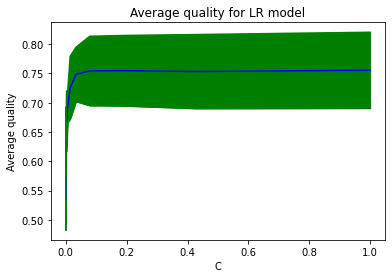

In [41]:
means = GS_LR.cv_results_['mean_test_score']
stds = GS_LR.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['C'], means, color = 'blue')
plt.plot(params['C'], means - error, color = 'green')
plt.plot(params['C'], means + error, color = 'green')
plt.fill_between(params['C'], means - error, means + error, color = 'green')
plt.xlabel('C')
plt.ylabel('Average quality')
plt.title('Average quality for LR model')
plt.show()

###### kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100, 5)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [54]:
GS_kNN.fit(X=Xtr, y=ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [55]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 66}

In [56]:
# Лучший показатель ROC_AUC
GS_kNN.best_score_

0.5781813493911769

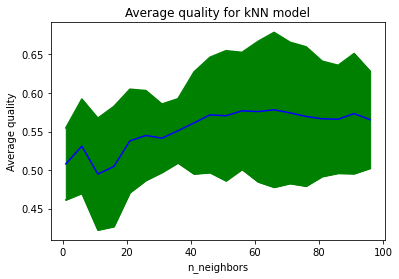

In [57]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

# Нормировка данных

Нормируем данные и проверяем качество

In [60]:
from sklearn.preprocessing import StandardScaler

In [61]:
ss = StandardScaler(with_mean=True, with_std=True)

X_scaled = ss.fit_transform(Xtr)

X_val_scaled = ss.transform(Xval)

# Модели на нормированных данных

###### Decision Tree Classifier

In [62]:
dtc = DecisionTreeClassifier()
params = {'min_samples_split': [3,4,5,6,7,8,9,10]}
cv = StratifiedKFold(shuffle=True, n_splits=5)

In [63]:
GS_dtc = GridSearchCV(estimator=dtc, param_grid=params, cv=cv, scoring='roc_auc')

In [64]:
# Заменяем df[train_cols] на X_scaled
GS_dtc.fit(X=X_scaled, y=ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

In [65]:
GS_dtc.best_score_

0.659145925681249

Скор не большой, так как мы перебрали не все параметры

Попробуйте факультативно попробовать поварьировать другие параметры и добиться лучшего ROC_AUC

###### Logistic Regression

In [66]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [67]:
model = LogisticRegression()
params = {'C': np.logspace(-7, 0, 20)}
GS_LR = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [68]:
GS_LR.fit(X=X_scaled, y=ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-07, 2.33572147e-07, 5.45559478e-07, 1.27427499e-06,
       2.97635144e-06, 6.95192796e-06, 1.62377674e-05, 3.79269019e-05,
       8.85866790e-05, 2.06913808e-04, 4.83293024e-04, 1.12883789e-03,
       2.63665090e-03, 6.15848211e-03, 1.43844989e-02, 3.35981829e-02,
       7.84759970e-02, 1.83298071e-01, 4.28133240e-01, 1.00000000e+00])},
             scoring='roc_auc')

In [69]:
GS_LR.best_params_

{'C': 8.858667904100833e-05}

In [70]:
GS_LR.best_score_

0.7543504594820385

###### kNN

In [71]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [72]:
model = KNeighborsClassifier()
params = {'n_neighbors': range(1,100, 5)}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_kNN = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

In [73]:
GS_kNN.fit(X_scaled, ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 100, 5)}, scoring='roc_auc')

In [74]:
# Лучший параметр 'n_neighbors'
GS_kNN.best_params_

{'n_neighbors': 71}

In [75]:
GS_kNN.best_score_

0.7492359084605741

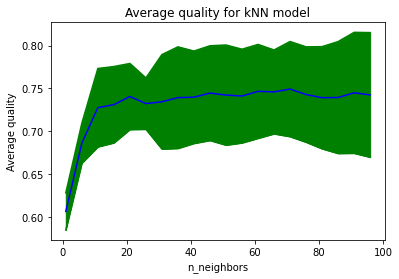

In [76]:
means = GS_kNN.cv_results_['mean_test_score']
stds = GS_kNN.cv_results_['std_test_score']
error = 1.95 * stds
plt.plot(params['n_neighbors'], means, color = 'blue')
plt.plot(params['n_neighbors'], means - error, color = 'green')
plt.plot(params['n_neighbors'], means + error, color = 'green')
plt.fill_between(params['n_neighbors'], means - error, means + error, color = 'green')
plt.xlabel('n_neighbors')
plt.ylabel('Average quality')
plt.title('Average quality for kNN model')
plt.show()

In [77]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре
DT_model = GS_dtc.best_estimator_ # Лучший ROC_AUC при гиперпараметре

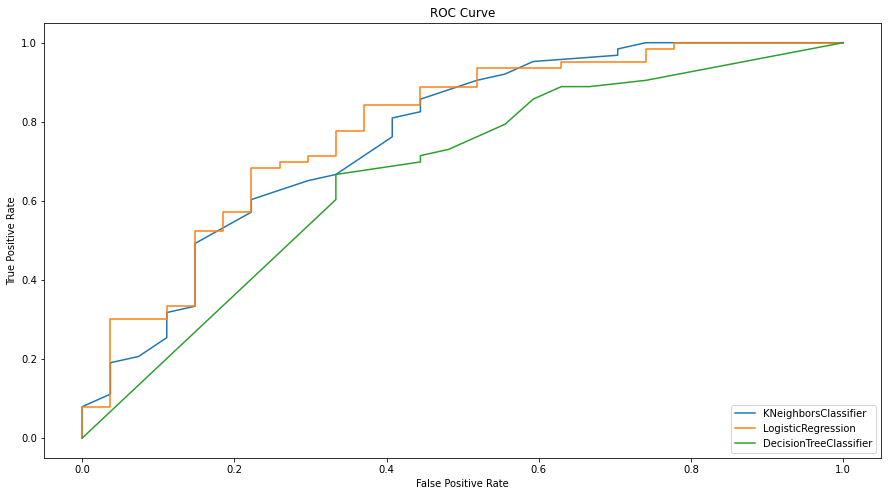

In [78]:
from sklearn.metrics import roc_curve


fig = plt.figure(figsize=(15,8))

ax = fig.add_subplot(1,1,1)
ax.set_xlim([-0.05,1.05])
ax.set_ylim([-0.05,1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve')
    
for model in [kNN_model, LR_model, DT_model]:
    
    scores = model.predict_proba(X_val_scaled)[:, 1]
    
    tpr, fpr, _ = roc_curve(yval, scores)
    
    ax.plot(tpr,fpr,label=model.__class__.__name__)

ax.legend(loc='lower right')
                                          
plt.show()

# Blending

Подробнее про ансамбли хорошо объясняется здесь:

https://dyakonov.org/2017/03/10/cтекинг-stacking-и-блендинг-blending/

In [79]:
# Библиотека для блендинга
from sklearn.ensemble import VotingClassifier

###### Выбираем наши лучшие модели (модели при лучших параметрах)

In [80]:
kNN_model = GS_kNN.best_estimator_ # Лучший ROC_AUC при гиперпараметре
LR_model = GS_LR.best_estimator_ # Лучший ROC_AUC при гиперпараметре

In [82]:
kNN_model = KNeighborsClassifier(n_neighbors=71)
LR_model = LogisticRegression(C=8.8586)

In [83]:
# Передаем в VotingClassifier наши модели для ансамбля
vc = VotingClassifier([('kNN', kNN_model), ('LR', LR_model)], voting='soft')

In [84]:
cv = StratifiedKFold(shuffle=True, n_splits=10)

In [85]:
# Запускаем поиск лучших параметров alpha_1, alpha_2 на кроссвалидации
grid = GridSearchCV(estimator=vc,
                    param_grid={'weights': [[i, 1 - i] for i in np.arange(0,1.1,0.1)]},
                    cv=cv,
                    scoring='roc_auc')
grid.fit(X_scaled, ytr)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=VotingClassifier(estimators=[('kNN',
                                                     KNeighborsClassifier(n_neighbors=71)),
                                                    ('LR',
                                                     LogisticRegression(C=8.8586))],
                                        voting='soft'),
             param_grid={'weights': [[0.0, 1.0], [0.1, 0.9], [0.2, 0.8],
                                     [0.30000000000000004, 0.7], [0.4, 0.6],
                                     [0.5, 0.5],
                                     [0.6000000000000001, 0.3999999999999999],
                                     [0.7000000000000001, 0.29999999999999993],
                                     [0.8, 0.19999999999999996],
                                     [0.9, 0.09999999999999998], [1.0, 0.0]]},
             scoring='roc_auc')

In [89]:
grid.best_params_

{'weights': [0.6000000000000001, 0.3999999999999999]}

In [86]:
# Напомним
print("Качество алгоритма kNN =", GS_kNN.best_score_)
print("Качество алгоритма LogReg =", GS_LR.best_score_)
print("Качество алгоритма ансамбля kNN и LogReg =", grid.best_score_)

Качество алгоритма kNN = 0.7492359084605741
Качество алгоритма LogReg = 0.7543504594820385
Качество алгоритма ансамбля kNN и LogReg = 0.7545338345864662


# Pipeline

In [87]:
X = pd.read_csv('./german_credit_data_train.csv')
y = (X.Risk == 'good') * 1
X.drop('Risk', axis=1, inplace=True)

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator

In [92]:
class FeauresTransform(BaseEstimator):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    def transform(self, df):
        df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})
        df['Saving accounts'] = df['Saving accounts'].fillna('Unknown')
        df['Checking account'] = df['Checking account'].fillna('Unknown')
        return df

In [93]:
vc = VotingClassifier([('kNN', KNeighborsClassifier(**GS_kNN.best_params_)),
                       ('LR', LogisticRegression(**GS_LR.best_params_))], voting='soft', weights = [0.6, 0.4])

In [94]:
pipe = Pipeline([('features', FeauresTransform()),
                 ('cats', OneHotEncoder(cols=cat)),
                 ('scaler', StandardScaler()),
                 ('best_model', vc)
                ])

In [95]:
a_p = pipe.fit_transform(X, y)

### Готовим предсказания на отправку

In [96]:
X_test = pd.read_csv('./german_credit_data_test.csv')
X_test.drop('Risk', axis=1, inplace=True)

In [97]:
preds = pipe.predict_proba(X_test)[:, 1]

In [98]:
X_test['Risk'] = preds

In [99]:
X_test

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,43,1,2,rent,little,little,2625,16,car,0.565253
1,44,1,2,own,Unknown,Unknown,3485,20,car,0.800017
2,42,1,2,free,Unknown,Unknown,10477,36,car,0.745922
3,40,1,2,rent,Unknown,Unknown,1386,15,radio/TV,0.825223
4,36,1,3,own,little,Unknown,1278,24,radio/TV,0.823981
...,...,...,...,...,...,...,...,...,...,...
95,31,0,1,own,little,Unknown,1736,12,furniture/equipment,0.747482
96,40,1,3,own,little,little,3857,30,car,0.658246
97,38,1,2,own,little,Unknown,804,12,radio/TV,0.808297
98,23,1,2,free,little,little,1845,45,radio/TV,0.598072


In [100]:
X_test[['Risk']].to_csv('./submition.csv', index=False)

### Посмотрим финальный score

In [101]:
from sklearn.metrics import roc_auc_score

In [102]:
answers = pd.read_csv('./answers.csv', index_col=0)

In [103]:
answers.Risk = answers.Risk.map({'good': 1, 'bad': 0})

In [104]:
roc_auc_score(y_true=answers.Risk.values, y_score=preds)

0.7637867647058824

_____

_____

_____

_____

_____

_____

_____